In [1]:
a = 1
b = 1
print(a==b)

True


In [2]:
a = 1
b = 1
print(id(a), '---', id(b))
print(a is b)

140482668796208 --- 140482668796208
True


In [4]:
a = 257
b = 257
print(a == b)
print(id(a))
print(id(b))
print(a is b)

True
140482837763632
140482837764016
False


In [9]:
l1 = [1, 2, 3]
l2 = list(l1)
print(l1, '----', l2)
print(l1 is l2)
print(l1 == l2)

s1 = set([1,2,3])
s2 = set(s1)
print(s1, '---', s2)
print(s1 is s2)
print(s1 == s2)

[1, 2, 3] ---- [1, 2, 3]
False
True
{1, 2, 3} --- {1, 2, 3}
False
True


In [10]:
l3 = l1[:]
print(l1, '---', l3) # [1, 2, 3] ---- [1, 2, 3]
print(l1 is l3) # False
print(l1 == l3) # True

[1, 2, 3] --- [1, 2, 3]
False
True


In [11]:
t1 = (1,2,3)
t2 = tuple(t1)
print(t1, '---', t2)
print(t1 is t2)
print(t1 == t2)

(1, 2, 3) --- (1, 2, 3)
True
True


In [14]:
l1 = [[1,2], (10,20)]
l2 = list(l1)
l1.append(50)
l1[0].append(3)

print(l1)
print(l2)

l1[1]+=(30,40)
print(l1)
print(l2)

[[1, 2, 3], (10, 20), 50]
[[1, 2, 3], (10, 20)]
[[1, 2, 3], (10, 20, 30, 40), 50]
[[1, 2, 3], (10, 20)]


In [15]:
import copy
l1 = [[1,2], (10,20)]
l2 = copy.deepcopy(l1)
l1.append(50)
l1[0].append(3)
print(l1)
print(l2)

[[1, 2, 3], (10, 20), 50]
[[1, 2], (10, 20)]


In [16]:

import copy
x = [1]
x.append(x)

y = copy.deepcopy(x)

# 以下命令的输出是？
x == y

RecursionError: maximum recursion depth exceeded in comparison

In [17]:
def func(l):
    l.append(4)

l2 = [1,2,3]
func(l2)
print(l2)

[1, 2, 3, 4]


In [18]:
def func(message):
    print(f"hello, {message}")

send_message = func
send_message("china")

hello, china


In [19]:
def my_decorator(func):
    def wrapper(message):
        print("wrapper of decorator")
        func(message)
    return wrapper

@my_decorator
def greeter(message):
    print(f"hello, {message}")

greeter("ASML")

wrapper of decorator
hello, ASML


In [22]:
def rpeat(num):
    def my_decorator(func):
        def wrapper(*args, **kwargs):
            for i in range(num):
                print("wrapper of decorator")
                func(*args, **kwargs)
        return wrapper
    return my_decorator

@rpeat(4)
def greeter(message):
    print(message)

greeter("NVDIA")
print(greeter.__name__)

wrapper of decorator
NVDIA
wrapper of decorator
NVDIA
wrapper of decorator
NVDIA
wrapper of decorator
NVDIA
wrapper


In [23]:
import functools

def my_decorator(func):
    @functools.wraps(func)
    def wrapper(*args, **kwargs):
        print("wrapper of decorator")
        func(*args, **kwargs)
    return wrapper

@my_decorator
def greeter(message):
    print(f"hello, {message}")

greeter("Apple")
print(greeter.__name__)

wrapper of decorator
hello, Apple
greeter


In [26]:
class Count:
    def __init__(self, func):
        self.func = func
        self.num_calls = 0

    def __call__(self, *args, **kwargs):
        self.num_calls += 1
        print(f"num of calls is {self.num_calls}")
        return self.func(*args, **kwargs)

@Count
def example():
    print("hello, world")

example()

example()

num of calls is 1
hello, world
num of calls is 2
hello, world


In [28]:
import functools

def decorator1(func):
    @functools.wraps(func)
    def wrapper(*args, **kwargs):
        print("decorator1")
        func(*args, **kwargs)
    return wrapper

def decorator2(func):
    @functools.wraps(func)
    def wrapper(*args, **kwargs):
        print("decorator2")
        func(*args, **kwargs)
    return wrapper

@decorator1
@decorator2
def greeter(message):
    print(f"hello, {message}")

greeter("YYDS")

decorator1
decorator2
hello, YYDS


In [29]:
import functools


def check_user_logged_in(request):
    pass


def authenticate(func):
    @functools.wraps(func)
    def wrapper(*args, **kwargs):
        request = args[0]
        if check_user_logged_in(request): # 如果用户处于登录状态
            return func(*args, **kwargs)  # 执行函数post_comment
        else:
            return Exception("Authentication failed")
    return wrapper

@authenticate
def post_comment(request, ...):
    ...

SyntaxError: invalid syntax (822909339.py, line 19)

In [32]:
import yaml
class Monster(yaml.YAMLObject):
  yaml_tag = u'!Monster'
  def __init__(self, name, hp, ac, attacks):
    self.name = name
    self.hp = hp
    self.ac = ac
    self.attacks = attacks
  def __repr__(self):
    return "%s(name=%r, hp=%r, ac=%r, attacks=%r)" % (
       self.__class__.__name__, self.name, self.hp, self.ac,
       self.attacks)

yaml.load(
"""
--- !Monster
name: Cave spider
hp: [2,6]    # 2d6
ac: 16
attacks: [BITE, HURT]
""")

Monster(name='Cave spider', hp=[2, 6], ac=16, attacks=['BITE', 'HURT'])

print(yaml.dump(Monster(
    name='Cave lizard', hp=[3,6], ac=16, attacks=['BITE','HURT'])))

TypeError: load() missing 1 required positional argument: 'Loader'

In [34]:
class MyClass:
    pass

instance = MyClass()
print(type(instance))
print(type(MyClass))

<class '__main__.MyClass'>
<class 'type'>


In [35]:
class MyClass:
    data = 1

instance = MyClass()
print(MyClass, instance)
print(instance.data)

<class '__main__.MyClass'> <__main__.MyClass object at 0x7fc4b6f7b610>
1


In [37]:
MyClass = type('MyClass', (), {'data':1})
instance = MyClass()
print(MyClass, instance)

<class '__main__.MyClass'> <__main__.MyClass object at 0x7fc4b6f472b0>


In [39]:
def is_iterable(param):
    try:
        iter(param)
        return True
    except TypeError:
        return False

params = [
    1234,
    '1234',
    [1, 2, 3, 4],
    set([1, 2, 3, 4]),
    {1:1, 2:2, 3:3, 4:4},
    (1, 2, 3, 4)
]

for i in params:
    print(f"{i} is iterable? {is_iterable(i)}")

1234 is iterable? False
1234 is iterable? True
[1, 2, 3, 4] is iterable? True
{1, 2, 3, 4} is iterable? True
{1: 1, 2: 2, 3: 3, 4: 4} is iterable? True
(1, 2, 3, 4) is iterable? True


In [1]:
import os
import psutil

def show_memory_info(hint):
    pid = os.getpid()
    p = psutil.Process(pid)
    info = p.memory_full_info()
    memory = info.uss / 1024. / 1024
    print(f"{hint} memory used: {memory} MB")


def test_iterator():
    show_memory_info('initing iterator')
    list_1 = [i for i in range(100000000)]
    show_memory_info('after iterator initiated')
    print(sum(list_1))
    show_memory_info('after sum called')

def test_generator():
    show_memory_info('initing generator')
    list_2 = (i for i in range(100000000))
    show_memory_info('after generator initiated')
    print(sum(list_2))
    show_memory_info('after sum called')

test_iterator()
test_generator()

initing iterator memory used: 47.90625 MB
after iterator initiated memory used: 2058.5078125 MB
4999999950000000
after sum called memory used: 3888.28125 MB
initing generator memory used: 30.125 MB
after generator initiated memory used: 30.125 MB
4999999950000000
after sum called memory used: 30.21484375 MB


In [16]:
import time

def crawl_page(url):
    print(f"crawling {url}")
    sleep_time = int(url.split('_')[-1])
    time.sleep(sleep_time)
    print(f"ok {url}")

def main(urls):
    for url in urls:
        crawl_page(url)

%time main(['url_1', 'url_2', 'url_3', 'url_4', 'url_5', 'url_6', 'url_7'])
print(main(''))

crawling url_1
ok url_1
crawling url_2
ok url_2
crawling url_3
ok url_3
crawling url_4
ok url_4
crawling url_5
ok url_5
crawling url_6
ok url_6
crawling url_7
ok url_7
CPU times: user 6.64 ms, sys: 2.57 ms, total: 9.21 ms
Wall time: 28 s
None


In [21]:

import asyncio

async def crawl_page_async(url):
    print('crawling {}'.format(url))
    sleep_time = int(url.split('_')[-1])
    await asyncio.sleep(sleep_time)
    print('OK {}'.format(url))

async def main_async(urls):
    for url in urls:
        await crawl_page_async(url)

await main_async(['url_1', 'url_2', 'url_3', 'url_4', 'url_5', 'url_6', 'url_7'])

########## 输出 ##########
print(main_async(''))
print(crawl_page_async('_1'))

crawling url_1
OK url_1
crawling url_2
OK url_2
crawling url_3
OK url_3
crawling url_4
OK url_4
crawling url_5
OK url_5
crawling url_6
OK url_6
crawling url_7
OK url_7
<coroutine object main_async at 0x7fdb5509c8c0>
<coroutine object crawl_page_async at 0x7fdb5509c8c0>


/var/folders/05/xk850z3d6q904bqtx0pqjr7w0000gn/T/ipykernel_2126/1518427547.py:16: RuntimeWarning: coroutine 'main_async' was never awaited
  print(main_async(''))
/var/folders/05/xk850z3d6q904bqtx0pqjr7w0000gn/T/ipykernel_2126/1518427547.py:17: RuntimeWarning: coroutine 'crawl_page_async' was never awaited
  print(crawl_page_async('_1'))


In [24]:
import asyncio

async def crawl_page_async(url):
    print('crawling {}'.format(url))
    sleep_time = int(url.split('_')[-1])
    await asyncio.sleep(sleep_time)
    print('OK {}'.format(url))

async def main_async(urls):
    tasks = [asyncio.create_task(crawl_page_async(url)) for url in urls]
    for task in tasks:
        await task

await main_async(['url_1', 'url_2', 'url_3', 'url_4', 'url_5', 'url_6', 'url_7'])
print(main_async('')) # <coroutine object main_async at 0x7fdb53f0f940>
print(crawl_page_async('_1')) # <coroutine object crawl_page_async at 0x7fdb5502ae40>

crawling url_1
crawling url_2
crawling url_3
crawling url_4
crawling url_5
crawling url_6
crawling url_7
OK url_1
OK url_2
OK url_3
OK url_4
OK url_5
OK url_6
OK url_7
<coroutine object main_async at 0x7fdb5509ca40>
<coroutine object crawl_page_async at 0x7fdb5509ca40>


/var/folders/05/xk850z3d6q904bqtx0pqjr7w0000gn/T/ipykernel_2126/867844277.py:15: RuntimeWarning: coroutine 'main_async' was never awaited
  print(main_async('')) # <coroutine object main_async at 0x7fdb53f0f940>
/var/folders/05/xk850z3d6q904bqtx0pqjr7w0000gn/T/ipykernel_2126/867844277.py:16: RuntimeWarning: coroutine 'crawl_page_async' was never awaited
  print(crawl_page_async('_1')) # <coroutine object crawl_page_async at 0x7fdb5502ae40>


In [25]:
import asyncio

async def crawl_page_async(url):
    print('crawling {}'.format(url))
    sleep_time = int(url.split('_')[-1])
    await asyncio.sleep(sleep_time)
    print('OK {}'.format(url))

async def main_async(urls):
    tasks = [asyncio.create_task(crawl_page_async(url)) for url in urls]
    await asyncio.gather(*tasks)

await main_async(['url_1', 'url_2', 'url_3', 'url_4', 'url_5', 'url_6', 'url_7'])
print(main_async('')) # <coroutine object main_async at 0x7fdb53f0f940>
print(crawl_page_async('_1')) # <coroutine object crawl_page_async at 0x7fdb5502ae40>

crawling url_1
crawling url_2
crawling url_3
crawling url_4
crawling url_5
crawling url_6
crawling url_7
OK url_1
OK url_2
OK url_3
OK url_4
OK url_5
OK url_6
OK url_7
<coroutine object main_async at 0x7fdb55095140>
<coroutine object crawl_page_async at 0x7fdb55095140>


/var/folders/05/xk850z3d6q904bqtx0pqjr7w0000gn/T/ipykernel_2126/1696052151.py:14: RuntimeWarning: coroutine 'main_async' was never awaited
  print(main_async('')) # <coroutine object main_async at 0x7fdb53f0f940>
/var/folders/05/xk850z3d6q904bqtx0pqjr7w0000gn/T/ipykernel_2126/1696052151.py:15: RuntimeWarning: coroutine 'crawl_page_async' was never awaited
  print(crawl_page_async('_1')) # <coroutine object crawl_page_async at 0x7fdb5502ae40>


In [28]:
import asyncio

async def worker_1():
    print('worker_1 start')
    await asyncio.sleep(1)
    print('worker_1 done')

async def worker_2():
    print('worker_2 start')
    await asyncio.sleep(2)
    print('worker_2 done')

async def main():
    print('before await')
    await worker_1()
    print('awaited worker_1')
    await worker_2()
    print('awaited worker_2')

await main()

before await
worker_1 start
worker_1 done
awaited worker_1
worker_2 start
worker_2 done
awaited worker_2


In [29]:
import asyncio

async def worker_1():
    print('worker_1 start')
    await asyncio.sleep(1)
    print('worker_1 done')

async def worker_2():
    print('worker_2 start')
    await asyncio.sleep(2)
    print('worker_2 done')

async def main():
    task1 = asyncio.create_task(worker_1())
    task2 = asyncio.create_task(worker_2())
    print('before await')
    await task1
    print('awaited worker_1')
    await task2
    print('awaited worker_2')

await main()

before await
worker_1 start
worker_2 start
worker_1 done
awaited worker_1
worker_2 done
awaited worker_2


In [36]:
import requests
from bs4 import BeautifulSoup

def main():
    headers = {
    'Host':'movie.douban.com',
    'User-Agent':'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/107.0.0.0 Safari/537.36',
    'Cookie':'bid=F1l4ghtrj_4; ap_v=0,6.0; _pk_id.100001.4cf6=7931be2691d5364a.1667973825.1.1667973825.1667973825.; _pk_ses.100001.4cf6=*; __utma=30149280.1548109094.1667973825.1667973825.1667973825.1; __utmb=30149280.0.10.1667973825; __utmc=30149280; __utmz=30149280.1667973825.1.1.utmcsr=(direct)|utmccn=(direct)|utmcmd=(none); __utma=223695111.1889506471.1667973825.1667973825.1667973825.1; __utmb=223695111.0.10.1667973825; __utmc=223695111; __utmz=223695111.1667973825.1.1.utmcsr=(direct)|utmccn=(direct)|utmcmd=(none)'
    }
    url = "https://movie.douban.com/cinema/later/beijing/"
    init_page = requests.get(url, headers=headers).content
    init_soup = BeautifulSoup(init_page, 'lxml')
    all_movies = init_soup.find('div', id="showing-soon")
    for each_movie in all_movies.find_all('div', class_="item"):
        all_a_tag = each_movie.find_all('a')
        all_li_tag = each_movie.find_all('li')

        movie_name = all_a_tag[1].text
        url_to_fetch = all_a_tag[1]['href']
        movie_date = all_li_tag[0].text

        response_item = requests.get(url_to_fetch, headers=headers).content
        soup_item = BeautifulSoup(response_item, 'lxml')
        img_tag = soup_item.find('img')

        print('{} {} {}'.format(movie_name, movie_date, img_tag['src']))

%time main()

扫黑行动 11月11日 https://img9.doubanio.com/view/photo/s_ratio_poster/public/p2883219876.jpg
陪你在全世界长大 11月11日 https://img2.doubanio.com/view/photo/s_ratio_poster/public/p2879590432.jpg
叫我郑先生 11月11日 https://img2.doubanio.com/view/photo/s_ratio_poster/public/p2882858722.jpg
你好，珠峰 11月11日 https://img1.doubanio.com/view/photo/s_ratio_poster/public/p2882856388.jpg
我们正年轻 11月11日 https://img1.doubanio.com/view/photo/s_ratio_poster/public/p2829300519.jpg
浏阳河上 11月11日 https://img2.doubanio.com/view/photo/s_ratio_poster/public/p2831086052.jpg
天之书 11月12日 https://img1.doubanio.com/view/photo/s_ratio_poster/public/p2880250328.jpg
您好，北京 11月18日 https://img1.doubanio.com/view/photo/s_ratio_poster/public/p2882109748.jpg
个十百千万 11月18日 https://img9.doubanio.com/view/photo/s_ratio_poster/public/p2883212096.jpg
让这首歌作证 11月18日 https://img9.doubanio.com/view/photo/s_ratio_poster/public/p2882862234.jpg
绑架游戏 12月23日 https://img1.doubanio.com/view/photo/s_ratio_poster/public/p2869898539.jpg
龙马精神 12月31日 https://img3.doubanio

In [1]:
import asyncio
import aiohttp

from bs4 import BeautifulSoup


async def fetch_content(url):
    headers = {
        'Host': 'movie.douban.com',
        'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/107.0.0.0 Safari/537.36',
        'Cookie': 'bid=F1l4ghtrj_4; ap_v=0,6.0; _pk_id.100001.4cf6=7931be2691d5364a.1667973825.1.1667973825.1667973825.; _pk_ses.100001.4cf6=*; __utma=30149280.1548109094.1667973825.1667973825.1667973825.1; __utmb=30149280.0.10.1667973825; __utmc=30149280; __utmz=30149280.1667973825.1.1.utmcsr=(direct)|utmccn=(direct)|utmcmd=(none); __utma=223695111.1889506471.1667973825.1667973825.1667973825.1; __utmb=223695111.0.10.1667973825; __utmc=223695111; __utmz=223695111.1667973825.1.1.utmcsr=(direct)|utmccn=(direct)|utmcmd=(none)'
    }
    async with aiohttp.ClientSession(
            headers=headers, connector=aiohttp.TCPConnector(ssl=False)
    ) as session:
        async with session.get(url) as response:
            return await response.text()


async def main():
    url = "https://movie.douban.com/cinema/later/hangzhou/"
    init_page = await fetch_content(url)
    init_soup = BeautifulSoup(init_page, 'lxml')

    movie_names, urls_to_fetch, movie_dates = [], [], []

    all_movies = init_soup.find('div', id="showing-soon")
    for each_movie in all_movies.find_all('div', class_="item"):
        all_a_tag = each_movie.find_all('a')
        all_li_tag = each_movie.find_all('li')

        movie_names.append(all_a_tag[1].text)
        urls_to_fetch.append(all_a_tag[1]['href'])
        movie_dates.append(all_li_tag[0].text)

    tasks = [fetch_content(url) for url in urls_to_fetch]
    pages = await asyncio.gather(*tasks)

    for movie_name, movie_date, page in zip(movie_names, movie_dates, pages):
        soup_item = BeautifulSoup(page, 'lxml')
        img_tag = soup_item.find('img')

        print('{} {} {}'.format(movie_name, movie_date, img_tag['src']))


await main()

扫黑行动 11月11日 https://img9.doubanio.com/view/photo/s_ratio_poster/public/p2883219876.jpg
陪你在全世界长大 11月11日 https://img2.doubanio.com/view/photo/s_ratio_poster/public/p2879590432.jpg
叫我郑先生 11月11日 https://img2.doubanio.com/view/photo/s_ratio_poster/public/p2882858722.jpg
你好，珠峰 11月11日 https://img1.doubanio.com/view/photo/s_ratio_poster/public/p2882856388.jpg
我们正年轻 11月11日 https://img1.doubanio.com/view/photo/s_ratio_poster/public/p2829300519.jpg
浏阳河上 11月11日 https://img2.doubanio.com/view/photo/s_ratio_poster/public/p2831086052.jpg
天之书 11月12日 https://img1.doubanio.com/view/photo/s_ratio_poster/public/p2880250328.jpg
您好，北京 11月18日 https://img1.doubanio.com/view/photo/s_ratio_poster/public/p2882109748.jpg
个十百千万 11月18日 https://img9.doubanio.com/view/photo/s_ratio_poster/public/p2883212096.jpg
让这首歌作证 11月18日 https://img9.doubanio.com/view/photo/s_ratio_poster/public/p2882862234.jpg
绑架游戏 12月23日 https://img1.doubanio.com/view/photo/s_ratio_poster/public/p2869898539.jpg
龙马精神 12月31日 https://img3.doubanio

In [7]:
import requests
import time

def download_one(url):
    resp = requests.get(url)
    print('Read {} from {}'.format(len(resp.content), url))

def download_all(sites):
    for site in sites:
        download_one(site)

def main():
    sites = [
        'https://en.wikipedia.org/wiki/Portal:Arts',
        'https://en.wikipedia.org/wiki/Portal:History',
        'https://en.wikipedia.org/wiki/Portal:Society',
        'https://en.wikipedia.org/wiki/Portal:Biography',
        'https://en.wikipedia.org/wiki/Portal:Mathematics',
        'https://en.wikipedia.org/wiki/Portal:Technology',
        'https://en.wikipedia.org/wiki/Portal:Geography',
        'https://en.wikipedia.org/wiki/Portal:Science',
        'https://en.wikipedia.org/wiki/Computer_science',
        'https://en.wikipedia.org/wiki/Python_(programming_language)',
        'https://en.wikipedia.org/wiki/Java_(programming_language)',
        'https://en.wikipedia.org/wiki/PHP',
        'https://en.wikipedia.org/wiki/Node.js',
        'https://en.wikipedia.org/wiki/The_C_Programming_Language',
        'https://en.wikipedia.org/wiki/Go_(programming_language)'
    ]
    start_time = time.perf_counter()
    download_all(sites)
    end_time = time.perf_counter()
    print('Download {} sites in {} seconds'.format(len(sites), end_time - start_time))

if __name__ == '__main__':
    main()

Read 252633 from https://en.wikipedia.org/wiki/Portal:Arts
Read 402590 from https://en.wikipedia.org/wiki/Portal:History
Read 291462 from https://en.wikipedia.org/wiki/Portal:Society
Read 451448 from https://en.wikipedia.org/wiki/Portal:Biography
Read 386888 from https://en.wikipedia.org/wiki/Portal:Mathematics
Read 361405 from https://en.wikipedia.org/wiki/Portal:Technology
Read 408164 from https://en.wikipedia.org/wiki/Portal:Geography
Read 303141 from https://en.wikipedia.org/wiki/Portal:Science
Read 384732 from https://en.wikipedia.org/wiki/Computer_science
Read 575710 from https://en.wikipedia.org/wiki/Python_(programming_language)
Read 348951 from https://en.wikipedia.org/wiki/Java_(programming_language)
Read 580856 from https://en.wikipedia.org/wiki/PHP
Read 201636 from https://en.wikipedia.org/wiki/Node.js
Read 67933 from https://en.wikipedia.org/wiki/The_C_Programming_Language
Read 377800 from https://en.wikipedia.org/wiki/Go_(programming_language)
Download 15 sites in 10.5303

In [6]:
import concurrent.futures
import requests
import threading
import time

def download_one(url):
    resp = requests.get(url)
    print('Read {} from {}'.format(len(resp.content), url))


def download_all(sites):
    with concurrent.futures.ThreadPoolExecutor(max_workers=5) as executor:
        executor.map(download_one, sites)

def main():
    sites = [
        'https://en.wikipedia.org/wiki/Portal:Arts',
        'https://en.wikipedia.org/wiki/Portal:History',
        'https://en.wikipedia.org/wiki/Portal:Society',
        'https://en.wikipedia.org/wiki/Portal:Biography',
        'https://en.wikipedia.org/wiki/Portal:Mathematics',
        'https://en.wikipedia.org/wiki/Portal:Technology',
        'https://en.wikipedia.org/wiki/Portal:Geography',
        'https://en.wikipedia.org/wiki/Portal:Science',
        'https://en.wikipedia.org/wiki/Computer_science',
        'https://en.wikipedia.org/wiki/Python_(programming_language)',
        'https://en.wikipedia.org/wiki/Java_(programming_language)',
        'https://en.wikipedia.org/wiki/PHP',
        'https://en.wikipedia.org/wiki/Node.js',
        'https://en.wikipedia.org/wiki/The_C_Programming_Language',
        'https://en.wikipedia.org/wiki/Go_(programming_language)'
    ]
    start_time = time.perf_counter()
    download_all(sites)
    end_time = time.perf_counter()
    print('Download {} sites in {} seconds'.format(len(sites), end_time - start_time))

if __name__ == '__main__':
    main()

Read 291462 from https://en.wikipedia.org/wiki/Portal:Society
Read 252633 from https://en.wikipedia.org/wiki/Portal:Arts
Read 386888 from https://en.wikipedia.org/wiki/Portal:Mathematics
Read 402590 from https://en.wikipedia.org/wiki/Portal:History
Read 451448 from https://en.wikipedia.org/wiki/Portal:Biography
Read 361405 from https://en.wikipedia.org/wiki/Portal:Technology
Read 408164 from https://en.wikipedia.org/wiki/Portal:Geography
Read 303141 from https://en.wikipedia.org/wiki/Portal:Science
Read 384732 from https://en.wikipedia.org/wiki/Computer_science
Read 575710 from https://en.wikipedia.org/wiki/Python_(programming_language)
Read 201636 from https://en.wikipedia.org/wiki/Node.js
Read 348951 from https://en.wikipedia.org/wiki/Java_(programming_language)
Read 67933 from https://en.wikipedia.org/wiki/The_C_Programming_Language
Read 580856 from https://en.wikipedia.org/wiki/PHP
Read 377800 from https://en.wikipedia.org/wiki/Go_(programming_language)
Download 15 sites in 2.25612

In [8]:
import concurrent.futures
import requests
import time

def download_one(url):
    resp = requests.get(url)
    print('Read {} from {}'.format(len(resp.content), url))

def download_all(sites):
    with concurrent.futures.ThreadPoolExecutor(max_workers=5) as executor:
        to_do = []
        for site in sites:
            future = executor.submit(download_one, site)
            to_do.append(future)

        for future in concurrent.futures.as_completed(to_do):
            future.result()
def main():
    sites = [
        'https://en.wikipedia.org/wiki/Portal:Arts',
        'https://en.wikipedia.org/wiki/Portal:History',
        'https://en.wikipedia.org/wiki/Portal:Society',
        'https://en.wikipedia.org/wiki/Portal:Biography',
        'https://en.wikipedia.org/wiki/Portal:Mathematics',
        'https://en.wikipedia.org/wiki/Portal:Technology',
        'https://en.wikipedia.org/wiki/Portal:Geography',
        'https://en.wikipedia.org/wiki/Portal:Science',
        'https://en.wikipedia.org/wiki/Computer_science',
        'https://en.wikipedia.org/wiki/Python_(programming_language)',
        'https://en.wikipedia.org/wiki/Java_(programming_language)',
        'https://en.wikipedia.org/wiki/PHP',
        'https://en.wikipedia.org/wiki/Node.js',
        'https://en.wikipedia.org/wiki/The_C_Programming_Language',
        'https://en.wikipedia.org/wiki/Go_(programming_language)'
    ]
    start_time = time.perf_counter()
    download_all(sites)
    end_time = time.perf_counter()
    print('Download {} sites in {} seconds'.format(len(sites), end_time - start_time))

if __name__ == '__main__':
    main()

Read 291462 from https://en.wikipedia.org/wiki/Portal:Society
Read 252633 from https://en.wikipedia.org/wiki/Portal:Arts
Read 402590 from https://en.wikipedia.org/wiki/Portal:History
Read 451448 from https://en.wikipedia.org/wiki/Portal:Biography
Read 408164 from https://en.wikipedia.org/wiki/Portal:Geography
Read 384732 from https://en.wikipedia.org/wiki/Computer_science
Read 575710 from https://en.wikipedia.org/wiki/Python_(programming_language)
Read 348951 from https://en.wikipedia.org/wiki/Java_(programming_language)
Read 580856 from https://en.wikipedia.org/wiki/PHP
Read 201636 from https://en.wikipedia.org/wiki/Node.js
Read 67933 from https://en.wikipedia.org/wiki/The_C_Programming_Language
Read 377800 from https://en.wikipedia.org/wiki/Go_(programming_language)
Read 368017 from https://en.wikipedia.org/wiki/Portal:Mathematics
Read 359677 from https://en.wikipedia.org/wiki/Portal:Technology
Read 299398 from https://en.wikipedia.org/wiki/Portal:Science
Download 15 sites in 9.02995

In [20]:
import asyncio
import aiohttp
import time

async def download_one(url):
    async with aiohttp.ClientSession() as session:
        async with session.get(url) as resp:
            print(f"read {resp.content_length} from {url}")

async def download_all(sites):
    tasks = [asyncio.create_task(download_one(site) for site in sites)]
    await asyncio.gather(*tasks)

def main():
    sites = [ 'https://en.wikipedia.org/wiki/Portal:Arts', 'https://en.wikipedia.org/wiki/Portal:History', 'https://en.wikipedia.org/wiki/Portal:Society', 'https://en.wikipedia.org/wiki/Portal:Biography', 'https://en.wikipedia.org/wiki/Portal:Mathematics', 'https://en.wikipedia.org/wiki/Portal:Technology', 'https://en.wikipedia.org/wiki/Portal:Geography', 'https://en.wikipedia.org/wiki/Portal:Science', 'https://en.wikipedia.org/wiki/Computer_science', 'https://en.wikipedia.org/wiki/Python_(programming_language)', 'https://en.wikipedia.org/wiki/Java_(programming_language)', 'https://en.wikipedia.org/wiki/PHP', 'https://en.wikipedia.org/wiki/Node.js', 'https://en.wikipedia.org/wiki/The_C_Programming_Language', 'https://en.wikipedia.org/wiki/Go_(programming_language)' ]
    start_time = time.perf_counter()
    asyncio.run(download_all(sites))
    end_time = time.perf_counter()
    print(f'Download {len(sites)} sites in {end_time - start_time} seconds')

if __name__ == '__main__':
    main()

/var/folders/05/xk850z3d6q904bqtx0pqjr7w0000gn/T/ipykernel_6507/3811547139.py:22: RuntimeWarning: coroutine 'main' was never awaited
  main()


In [7]:
def CountDown(n):
    while n > 0:
        n -= 1

%time CountDown(100000000)

CPU times: user 4.12 s, sys: 11.7 ms, total: 4.13 s
Wall time: 4.15 s


In [6]:
from threading import Thread

n = 100000000

t1 = Thread(target=CountDown, args=[n // 2])
t2 = Thread(target=CountDown, args=[n // 2])
t1.start()
t2.start()
t1.join()
t2.join()

In [8]:
import sys

a = []
b = a
sys.getrefcount(a)

3

In [38]:
import threading

n = 0

def foo():
    global n
    n += 1

threads = []
for i in range(100):
    t = threading.Thread(target=foo)
    threads.append(t)

for t in threads:
    t.start()

for t in threads:
    t.join()

print(n)
import dis
dis.dis(foo)

100
  7           0 LOAD_GLOBAL              0 (n)
              2 LOAD_CONST               1 (1)
              4 INPLACE_ADD
              6 STORE_GLOBAL             0 (n)
              8 LOAD_CONST               0 (None)
             10 RETURN_VALUE


In [44]:
import os
import psutil

# 显示当前 python 程序占用的内存大小
def show_memory_info(hint):
    pid = os.getpid()
    p = psutil.Process(pid)

    info = p.memory_full_info()
    memory = info.uss / 1024. / 1024
    print('{} memory used: {} MB'.format(hint, memory))


def func():
    show_memory_info('initial')
    global a
    a = [i for i in range(10000000)]
    show_memory_info('after a created')

func()
show_memory_info('finished')

########## 输出 ##########




initial memory used: 424.109375 MB
after a created memory used: 408.453125 MB
finished memory used: 408.45703125 MB


In [45]:
import os
import psutil

# 显示当前 python 程序占用的内存大小
def show_memory_info(hint):
    pid = os.getpid()
    p = psutil.Process(pid)

    info = p.memory_full_info()
    memory = info.uss / 1024. / 1024
    print('{} memory used: {} MB'.format(hint, memory))


def func():
    show_memory_info('initial')
    a = [i for i in range(10000000)]
    show_memory_info('after a created')
    return a

func()
show_memory_info('finished')

initial memory used: 418.625 MB
after a created memory used: 802.59375 MB
finished memory used: 418.37109375 MB


In [46]:

import sys

a = []

# 两次引用，一次来自 a，一次来自 getrefcount
print(sys.getrefcount(a))

def func(a):
    # 四次引用，a，python 的函数调用栈，函数参数，和 getrefcount
    print(sys.getrefcount(a))

func(a)

# 两次引用，一次来自 a，一次来自 getrefcount，函数 func 调用已经不存在
print(sys.getrefcount(a))

########## 输出 ##########

2
4
2


In [48]:
import gc

# 显示当前 python 程序占用的内存大小
def show_memory_info(hint):
    pid = os.getpid()
    p = psutil.Process(pid)

    info = p.memory_full_info()
    memory = info.uss / 1024. / 1024
    print('{} memory used: {} MB'.format(hint, memory))

show_memory_info('initial')

a = [i for i in range(1000000)]

show_memory_info('after a created')

del a
gc.collect()

show_memory_info('finish')
print(a)

initial memory used: 416.07421875 MB
after a created memory used: 461.27734375 MB
finish memory used: 88.234375 MB


NameError: name 'a' is not defined

In [49]:
def show_memory_info(hint):
    pid = os.getpid()
    p = psutil.Process(pid)

    info = p.memory_full_info()
    memory = info.uss / 1024. / 1024
    print('{} memory used: {} MB'.format(hint, memory))


def func():
    show_memory_info('initial')
    a = [i for i in range(10000000)]
    b = [i for i in range(10000000)]
    show_memory_info('after a, b created')
    a.append(b)
    b.append(a)

func()
show_memory_info('finished')

initial memory used: 98.89453125 MB
after a, b created memory used: 873.4296875 MB
finished memory used: 873.4296875 MB


In [50]:
import gc

def show_memory_info(hint):
    pid = os.getpid()
    p = psutil.Process(pid)

    info = p.memory_full_info()
    memory = info.uss / 1024. / 1024
    print('{} memory used: {} MB'.format(hint, memory))

def func():
    show_memory_info('initial')
    a = [i for i in range(10000000)]
    b = [i for i in range(10000000)]
    show_memory_info('after a, b created')
    a.append(b)
    b.append(a)

func()
gc.collect()
show_memory_info('finished')

initial memory used: 678.20703125 MB
after a, b created memory used: 856.4375 MB
finished memory used: 97.54296875 MB


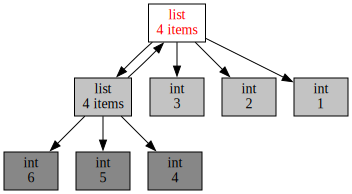

In [2]:
import objgraph

a = [1, 2, 3]
b = [4, 5, 6]

a.append(b)
b.append(a)

objgraph.show_refs([a])

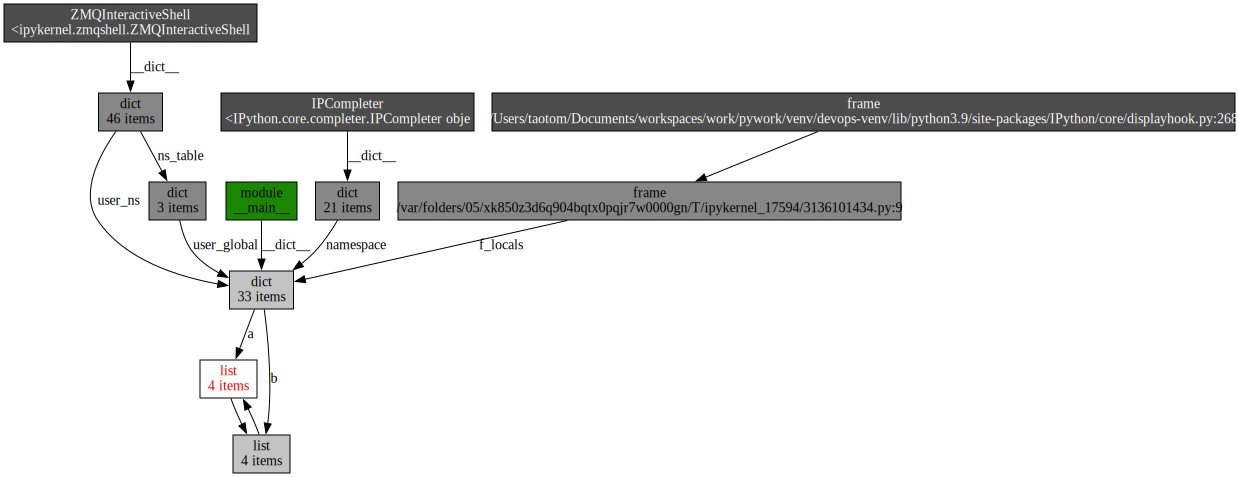

In [3]:

import objgraph

a = [1, 2, 3]
b = [4, 5, 6]

a.append(b)
b.append(a)

objgraph.show_backrefs([a])

In [4]:
from typing import Set


class Graph:
    def __init__(self, value, nodes=None):
        self._value = value
        self._nodes: list = [] if nodes is None else nodes

    @property
    def value(self):
        return self._value

    @property
    def nodes(self):
        return self._nodes

    def node_add(self, node):
        self._nodes.append(node)

    def node_adds(self, nodes):
        self._nodes.extend(nodes)

    def node_del(self, node):
        self._nodes.remove(node)

    def __str__(self):
        return "Graph {} nodes {}".format(self._value, [node.value for node in self.nodes])

    def __repr__(self):
        return self.__str__()


def dfs(start: Graph, includes: Set[Graph] = None) -> Set[Graph]:
    if includes is None:
        includes = set()
    if start in includes:
        return includes
    includes.add(start)
    for s in start.nodes:
        includes.update(dfs(s, includes))
    return includes


if __name__ == '__main__':
    A = Graph('A')
    B = Graph('B')
    C = Graph('C')
    D = Graph('D')
    E = Graph('E')
    F = Graph('F')
    has_nodes = {A, B, C, D, E, F}

    # A->B->E
    #  ->C->E
    # B->A
    # D->F
    # F->D
    A.node_adds([B, C])
    B.node_adds([A, E])
    C.node_adds([E])
    D.node_adds([F])
    F.node_adds([D])
    graph_nodes = dfs(A, set())
    # OUT: {Graph B nodes ['A', 'E'], Graph E nodes [], Graph C nodes ['E'], Graph A nodes ['B', 'C']}
    print(graph_nodes)
    # OUT: {Graph F nodes ['D'], Graph D nodes ['F']}
    print(has_nodes - graph_nodes)

{Graph A nodes ['B', 'C'], Graph B nodes ['A', 'E'], Graph C nodes ['E'], Graph E nodes []}
{Graph D nodes ['F'], Graph F nodes ['D']}


In [5]:
x = [1]
x.append(x)
print(x)
print(len(x))

# x 指向一个列表，列表的第一个元素为 1；执行了 append 操作后，第二个元素又反过来指向 x，即指向了 x 所指向的列表，因此形成了一个无限嵌套的循环：[1, [1, [1, [1, …]]]]。不过，虽然 x 是无限嵌套的列表，但 x.append(x) 的操作，并不会递归遍历其中的每一个元素。它只是扩充了原列表的第二个元素，并将其指向 x，因此不会出现 stack overflow 的问题，自然不会报错
# 为什么 len(x) 返回的是 2？我们还是来看 x，虽然它是无限嵌套的列表，但 x 的 top level 只有 2 个元素组成，第一个元素为 1，第二个元素为指向自身的列表，因此 len(x) 返回 2。

[1, [...]]
2
